# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 12.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 10.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 19.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 203 kB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [3]:
client = MongoClient(mongod_connect)
db = client.gp13 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [6]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1326631290238595073
1326631292226703362
1326631292763590668
1326631292910366723
1326631292193009664
1326631293325553668
1326631294445350913
1326631294986379265
1326631295632482307
1326631295800274947
1326631297813450753
1326631298337746947
1326631298811695106
1326631299461902337
1326631299860353024
1326631299591905280
1326631300682428416
1326631300829245446
1326631301756182528
1326631302309744647
1326631302704017410
1326631304025284613
1326631303148695558
1326631307242303489
1326631309456928771
1326631310408998913
1326631310547410946
1326631310778118144
1326631311763795969
1326631312015306752
1326631314372653056
1326631314645262338
1326631315609935876
1326631315781931012
1326631315706421249
1326631316918513664
1326631318214619136
1326631318940229638
1326631318956990468
1326631319632302080
1326631319653085185
1326631319745474565
1326631320735244288
1326631321372782594
1326631321595224066
1326631321595117568
1326631322530541571
1326631322710908936
1326631323692388354
1326631323977584641


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [7]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [8]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [9]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode (geocode=geocode)
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Nov 11 21:02:28 +0000 2020'
'Wed Nov 11 21:02:28 +0000 2020'
'Wed Nov 11 21:02:28 +0000 2020'
'Wed Nov 11 21:02:28 +0000 2020'
'Wed Nov 11 21:02:27 +0000 2020'
'Wed Nov 11 21:02:27 +0000 2020'
'Wed Nov 11 21:02:27 +0000 2020'
'Wed Nov 11 21:02:27 +0000 2020'
'Wed Nov 11 21:02:27 +0000 2020'
'Wed Nov 11 21:02:27 +0000 2020'
'Wed Nov 11 21:02:27 +0000 2020'
'Wed Nov 11 21:02:26 +0000 2020'
'Wed Nov 11 21:02:26 +0000 2020'
'Wed Nov 11 21:02:26 +0000 2020'
'Wed Nov 11 21:02:25 +0000 2020'
'Wed Nov 11 21:02:25 +0000 2020'
'Wed Nov 11 21:02:25 +0000 2020'
'Wed Nov 11 21:02:24 +0000 2020'
'Wed Nov 11 21:02:24 +0000 2020'
'Wed Nov 11 21:02:24 +0000 2020'
'Wed Nov 11 21:02:24 +0000 2020'
'Wed Nov 11 21:02:24 +0000 2020'
'Wed Nov 11 21:02:24 +0000 2020'
'Wed Nov 11 21:02:23 +0000 2020'
'Wed Nov 11 21:02:23 +0000 2020'
'Wed Nov 11 21:02:23 +0000 2020'
'Wed Nov 11 21:02:23 +0000 2020'
'Wed Nov 11 21:02:23 +0000 2020'
'Wed Nov 11 21:02:23 +0000 2020'
'Wed Nov 11 21:02:22 +0000 2020'
'Wed Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [10]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q)
                                            
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Nov 11 21:02:34 +0000 2020'
'Wed Nov 11 21:02:33 +0000 2020'
'Wed Nov 11 21:02:33 +0000 2020'
'Wed Nov 11 21:02:33 +0000 2020'
'Wed Nov 11 21:02:32 +0000 2020'
'Wed Nov 11 21:02:32 +0000 2020'
'Wed Nov 11 21:02:32 +0000 2020'
'Wed Nov 11 21:02:31 +0000 2020'
'Wed Nov 11 21:02:31 +0000 2020'
'Wed Nov 11 21:02:31 +0000 2020'
'Wed Nov 11 21:02:31 +0000 2020'
'Wed Nov 11 21:02:31 +0000 2020'
'Wed Nov 11 21:02:31 +0000 2020'
'Wed Nov 11 21:02:30 +0000 2020'
'Wed Nov 11 21:02:30 +0000 2020'
'Wed Nov 11 21:02:30 +0000 2020'
'Wed Nov 11 21:02:29 +0000 2020'
'Wed Nov 11 21:02:29 +0000 2020'
'Wed Nov 11 21:02:29 +0000 2020'
'Wed Nov 11 21:02:29 +0000 2020'
'Wed Nov 11 21:02:29 +0000 2020'
'Wed Nov 11 21:02:28 +0000 2020'
'Wed Nov 11 21:02:28 +0000 2020'
'Wed Nov 11 21:02:28 +0000 2020'
'Wed Nov 11 21:02:34 +0000 2020'
'Wed Nov 11 21:02:34 +0000 2020'


## View the Collected Tweets

Print the number of tweets and unique twitter users

In [11]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

12801
10971


Create a text index and print the Tweets containing specific keywords. 

In [12]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [14]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [15]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Ishdeep Kohli
text: #UNAIDS Congratulates
President-elect @JoeBiden
Vice President-elect
@KamalaHarris on their election
@UNAIDS looks… https://t.co/jLOWbtnVSe
----
name: The media is the virus
text: @SkyNews More lies the media is the virus 
Now the USA election has been rigged to elect Biden the God #MSM watch h… https://t.co/MSLtuSRI2k
----
name: Chad Cooper
text: RT @wateronmars33: #COVID19 #politics #elections
----
name: ✨Water🌊On🌊Mars ✨
text: #COVID19 #politics #elections https://t.co/LlvIMba9ma
----
name: Kari
text: But no one is going to talk about Covid19 after the election..... https://t.co/HxpsjSuyHn
----
name: Angela Melody
text: So how is that whole "the virus will disappear after the election" thing going? #COVID19 #notahoax #pandemic
----
name: Edinburgh Greens
text: RT @EdinburghGreens: Tomorrow is the #Edinburgh Council by-election in #CraigentinnyDuddingston. To vote for affordable homes, for more cyc…
----
name: FountainbridgeGreens
text: RT @EdinburghGree

In [16]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [17]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id,quoted_status_id_str,possibly_sensitive,quoted_status,display_text_range,extended_tweet,quote_count,reply_count,filter_level,timestamp_ms
0,5fac51661ce6371e8f0652a0,Wed Nov 11 21:02:15 +0000 2020,1326631349197877260,1326631349197877260,#COVID19 has ghost more #Americans than voted ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fac4fa83a59651001df38bb,Wed Nov 11 20:15:24 +0000 2020,1326619557478473730,1326619557478473730,RT @EdinburghGreens: Tomorrow is the #Edinburg...,False,"{'hashtags': [{'text': 'Edinburgh', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fac4fa73a59651001df3814,Wed Nov 11 20:16:08 +0000 2020,1326619743483277312,1326619743483277312,RT @EdinburghGreens: Tomorrow is the #Edinburg...,False,"{'hashtags': [{'text': 'Edinburgh', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fac4f9d3a59651001df34d8,Wed Nov 11 20:19:24 +0000 2020,1326620564799320080,1326620564799320080,More than a million .#COVID19 cases in #Texas ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fac4fae3a59651001df3aef,Wed Nov 11 20:13:09 +0000 2020,1326618992145002497,1326618992145002497,RT @MonicaLennon7: I’m pleased that all partie...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,1.326597e+18,1326597069503606786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fac4f9b3a59651001df33e7,Wed Nov 11 20:20:25 +0000 2020,1326620820232351745,1326620820232351745,"@OregonGovBrown I appreciate your work, I vote...",True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.326607e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fac4e6b3a59651001df0de3,Wed Nov 11 20:49:45 +0000 2020,1326628200668147712,1326628200668147712,RT @MonicaLennon7: I’m pleased that all partie...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.326597e+18,1326597069503606786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fac4fa73a59651001df3840,Wed Nov 11 20:15:58 +0000 2020,1326619698658603008,1326619698658603008,RT @thanh_neville: My mom told me she got bera...,False,"{'hashtags': [{'text': 'Biden', 'indices': [66...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fac4f943a59651001df3171,Wed Nov 11 20:23:06 +0000 2020,1326621495867695106,1326621495867695106,Americans traveling miles during pandemic to v...,True,"{'hashtags': [{'text': 'coronavirus', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.fs-poster.com"" rel=""nofol...",NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fac4f933a59651001df310b,Wed Nov 11 20:23:29 +0000 2020,1326621592366051328,1326621592366051328,RT @BrettPransky: They already demonstrated th...,False,"{'hashtags': [{'text': 'Georgia', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.326603e+18,1326603457076342785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


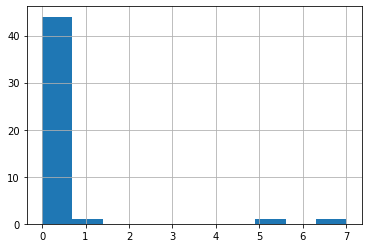

In [18]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count